<a href="https://colab.research.google.com/github/Jeonwoojae/predict_bitcoin_upbit/blob/main/LSTM_test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 11.1 MB/s 


# dataset 불러오기

In [2]:
import pyupbit
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


def Inseart_data_upbit(coin_select, date_select, countofdata):
	#################################################################################
    date=None
    #res = [pd.DataFrame(columns=['open','high','low', 'close', 'volume', 'value'])]


    res = []
    count = int(countofdata/200)
    for i in range(count):
        df = pyupbit.get_ohlcv('KRW-'+coin_select, interval=date_select, count=200, to=date)
        df['idCoin'] = coin_select    # 마켓 정보 추가

        market_date = df.index
        df['dateCoin'] = market_date    # 날짜 정보 추가
        # 열 이름은 테이블의 이름과 같아야한다.

        df = df[['dateCoin','idCoin', 'open', 'high', 'low', 'close', 'volume', 'value']]     # 데이터 순서 변경
        #print(df)
        res.append(df)

        date = df.index[0]
        time.sleep(0.01)

    df = pd.concat(res).sort_index()
    
    #print(type(df))
    #print(res)
    #print(df)
    return df
    ###############################################################################


In [3]:
# 예측할 코인 ID
coinid = 'BTC'

# 시작가 or 종료가
col = 'close'

# 분봉 단위 및 day단위
interval = 'minute5'

# API를 통해서 가져올 데이터의 수
rows = 2000

loaded_data = Inseart_data_upbit(coinid, interval,rows)
dataset = loaded_data.drop([loaded_data.columns[0], loaded_data.columns[1]], axis=1)
times = dataset.index

In [4]:
dataset

,open,high,low,close,volume,value
2022-08-05 23:25:00,30707000.0,30743000.0,30683000.0,30737000.0,23.817604,7.314352e+08
2022-08-05 23:30:00,30716000.0,30741000.0,30680000.0,30693000.0,16.420874,5.044122e+08
2022-08-05 23:35:00,30694000.0,30743000.0,30680000.0,30736000.0,11.170298,3.431649e+08
2022-08-05 23:40:00,30737000.0,30760000.0,30711000.0,30730000.0,11.396633,3.503511e+08
2022-08-05 23:45:00,30730000.0,30830000.0,30714000.0,30790000.0,18.851471,5.804914e+08
...,...,...,...,...,...,...
2022-08-09 12:40:00,31604000.0,31609000.0,31601000.0,31606000.0,11.885199,3.756379e+08
2022-08-09 12:45:00,31607000.0,31620000.0,31606000.0,31616000.0,11.422867,3.611338e+08
2022-08-09 12:50:00,31616000.0,31620000.0,31602000.0,31602000.0,17.239907,5.450391e+08
2022-08-09 12:55:00,31602000.0,31613000.0,31592000.0,31612000.0,7.783936,2.459948e+08


In [5]:
times

DatetimeIndex(['2022-08-05 23:25:00', '2022-08-05 23:30:00',
               '2022-08-05 23:35:00', '2022-08-05 23:40:00',
               '2022-08-05 23:45:00', '2022-08-05 23:50:00',
               '2022-08-05 23:55:00', '2022-08-06 00:00:00',
               '2022-08-06 00:05:00', '2022-08-06 00:10:00',
               ...
               '2022-08-09 12:15:00', '2022-08-09 12:20:00',
               '2022-08-09 12:25:00', '2022-08-09 12:30:00',
               '2022-08-09 12:35:00', '2022-08-09 12:40:00',
               '2022-08-09 12:45:00', '2022-08-09 12:50:00',
               '2022-08-09 12:55:00', '2022-08-09 13:00:00'],
              dtype='datetime64[ns]', length=2000, freq=None)

Text(0, 0.5, 'price')

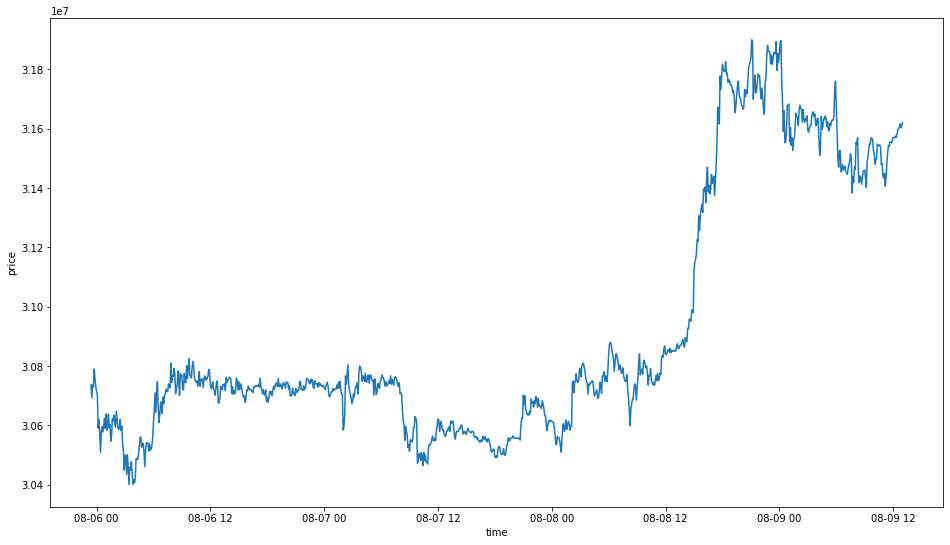

In [12]:
## 시각화

plt.figure(figsize=(16, 9))
# plot_data = dataset[['open','close']]
plt.plot(dataset.index,dataset['close'])
plt.xlabel('time')
plt.ylabel('price')

In [16]:
## 전처리
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['open', 'high', 'low', 'close', 'volume', 'value']
# 스케일 후 columns
scaled = scaler.fit_transform(dataset[scale_cols])
scaled

array([[0.20374081, 0.20830543, 0.20507682, 0.22429907, 0.20235392,
        0.19843754],
       [0.20975284, 0.20696584, 0.20307281, 0.19492657, 0.13915064,
        0.1364923 ],
       [0.19505678, 0.20830543, 0.20307281, 0.22363151, 0.09428573,
        0.09249456],
       ...,
       [0.81095524, 0.79571333, 0.81897128, 0.80173565, 0.14614908,
        0.14757772],
       [0.80160321, 0.79102478, 0.81229125, 0.80841121, 0.06535008,
        0.06598085],
       [0.80828323, 0.79504354, 0.8249833 , 0.81308411, 0.01882421,
        0.01903449]])

In [18]:
## 새로운 데이터셋
scaled_df = pd.DataFrame(scaled, columns=scale_cols)

# train / test 나누기

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_df.drop('close', 1), scaled_df['close'], test_size=0.2, random_state=0, shuffle=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
x_train.shape, y_train.shape

((1600, 5), (1600,))

In [23]:
x_test.shape, y_test.shape

((400, 5), (400,))

In [24]:
x_train

,open,high,low,volume,value
0,0.203741,0.208305,0.205077,0.202354,0.198438
1,0.209753,0.206966,0.203073,0.139151,0.136492
2,0.195057,0.208305,0.203073,0.094286,0.092495
3,0.223781,0.219692,0.223781,0.096220,0.094455
4,0.219105,0.266577,0.225785,0.159920,0.157251
...,...,...,...,...,...
1595,0.676687,0.669792,0.690047,0.162208,0.162763
1596,0.686707,0.695244,0.696727,0.207416,0.208310
1597,0.686707,0.695244,0.696727,0.207416,0.208310
1598,0.693387,0.675820,0.665999,0.193366,0.193931


# TensorFlow Dataset을 사용하여 시퀀스 데이터셋 구성하기

In [25]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [26]:
# 하이퍼파라미터 정하기
WINDOW_SIZE=20
BATCH_SIZE=32

In [27]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [28]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


# 모델

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import warnings


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [35]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [33]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [36]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
     46/Unknown - 3s 12ms/step - loss: 0.0089 - mse: 0.0178
Epoch 1: val_loss improved from inf to 0.04277, saving model to tmp/ckeckpointer.ckpt
50/50 [==============================] - 4s 27ms/step - loss: 0.0084 - mse: 0.0169 - val_loss: 0.0428 - val_mse: 0.0855
Epoch 2/50
48/50 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.0023
Epoch 2: val_loss improved from 0.04277 to 0.01732, saving model to tmp/ckeckpointer.ckpt
50/50 [==============================] - 1s 15ms/step - loss: 0.0011 - mse: 0.0023 - val_loss: 0.0173 - val_mse: 0.0346
Epoch 3/50
49/50 [============================>.] - ETA: 0s - loss: 4.2847e-04 - mse: 8.5694e-04
Epoch 3: val_loss improved from 0.01732 to 0.00258, saving model to tmp/ckeckpointer.ckpt
50/50 [==============================] - 1s 13ms/step - loss: 4.2656e-04 - mse: 8.5313e-04 - val_loss: 0.0026 - val_mse: 0.0052
Epoch 4/50
50/50 [==============================] - ETA: 0s - loss: 2.4242e-04 - mse: 4.8484e-04
Epoch 4: val

In [37]:
# 저장한 modelcheckpoint를 로드
model.load_weights(filename)

In [38]:
# test_data를 사용하여 예측을 진행
pred = model.predict(test_data)

In [39]:
pred.shape

(380, 1)

# 예측 데이터 시각화

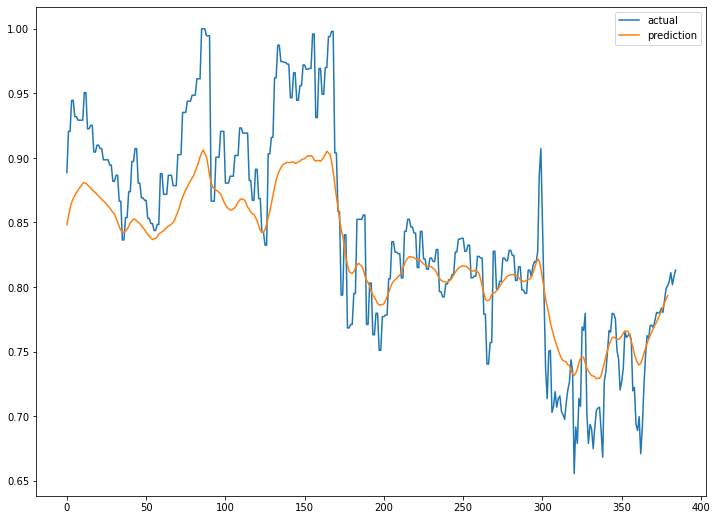

In [43]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[15:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
# 다른 데이터일 때 예측 필요